In [34]:
import pandas as pd 
import string

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import TextVectorization, LSTM, Dropout, Bidirectional, Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
fake = pd.read_csv('/kaggle/input/fake-news-detection/fake.csv')
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
true = pd.read_csv('/kaggle/input/fake-news-detection/true.csv')
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
fake['label'] = 0
true['label'] = 1

In [5]:
data = pd.concat([fake, true]).reset_index(drop=True)

In [6]:
data

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
data.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [9]:
data['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data['label'].value_counts()

label
0    23478
1    21211
Name: count, dtype: int64

In [12]:
data['date'] = pd.to_datetime(data['date'], format='mixed' , dayfirst=True , errors='coerce')



In [13]:
data

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,1


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [16]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) > 2]
    words = [stemmer.stem(word) for word in words]
    
    return " ".join(words)


In [20]:
data["cleaned_text"] = data["text"].apply(clean)

In [21]:
data[['text', 'cleaned_text']].head(10)


,text,cleaned_text
0,Donald Trump just couldn t wish all Americans ...,donald trump wish american happi new year leav...
1,House Intelligence Committee Chairman Devin Nu...,hous intellig committe chairman devin nune go ...
2,"On Friday, it was revealed that former Milwauk...",friday reveal former milwauke sheriff david cl...
3,"On Christmas day, Donald Trump announced that ...",christma day donald trump announc would back w...
4,Pope Francis used his annual Christmas Day mes...,pope franci use annual christma day messag reb...
5,The number of cases of cops brutalizing and ki...,number case cop brutal kill peopl color seem s...
6,Donald Trump spent a good portion of his day a...,donald trump spent good portion day golf club ...
7,In the wake of yet another court decision that...,wake yet anoth court decis derail donald trump...
8,Many people have raised the alarm regarding th...,mani peopl rais alarm regard fact donald trump...
9,Just when you might have thought we d get a br...,might thought get break watch peopl kiss donal...


In [24]:
x = data["cleaned_text"]
y = data["label"]

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [27]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_seq, maxlen=max_len)
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len)

In [35]:
model = Sequential()

model.add(Embedding(input_dim=5000, output_dim=64, input_length=200))

model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(64)) 
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [37]:
history = model.fit(
    x_train_pad, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test_pad, y_test),
    callbacks = [early_stop]
)


Epoch 1/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8031 - loss: 0.3929 - val_accuracy: 0.9645 - val_loss: 0.1056
Epoch 2/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9715 - loss: 0.0871 - val_accuracy: 0.9778 - val_loss: 0.0711
Epoch 3/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9813 - loss: 0.0634 - val_accuracy: 0.9898 - val_loss: 0.0367
Epoch 4/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9847 - loss: 0.0520 - val_accuracy: 0.9786 - val_loss: 0.0681
Epoch 5/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9885 - loss: 0.0441 - val_accuracy: 0.9912 - val_loss: 0.0302
Epoch 6/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9828 - loss: 0.0512 - val_accuracy: 0.9944 - val_loss: 0.0176
Epoch 7/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9966 - loss: 0.0117 - val_accuracy: 0.9945 - val_loss: 0.0195
Epoch 8/20
559/559 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9976 - loss: 0.0074 - 

In [38]:
loss, accuracy = model.evaluate(x_test_pad, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9952 - loss: 0.0163
Test Accuracy: 99.54%


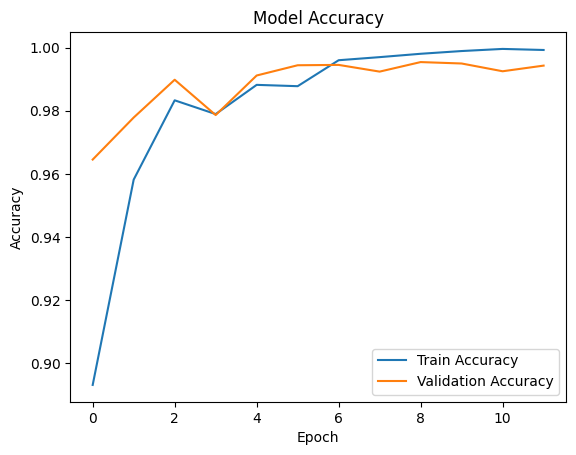

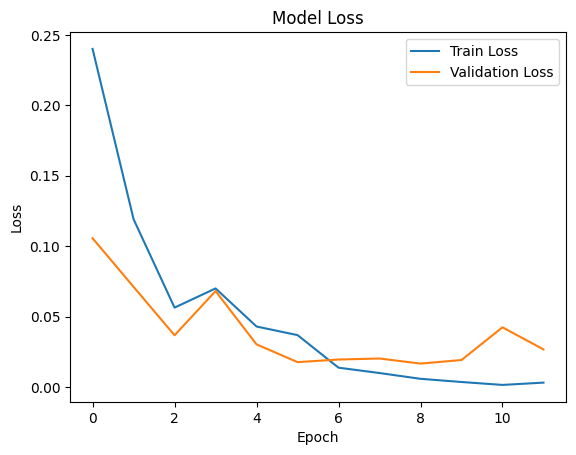

In [39]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [40]:
# Save model
model.save("fake_news_lstm_model.h5")

# Save tokenizer
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
